In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

Mounted at /content/gdrive/


In [ ]:
from sklearn.model_selection import GridSearchCV
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [ ]:
test = pd.read_csv('/content/gdrive/MyDrive/1_subtask2method3/test.csv')
train = pd.read_csv('/content/gdrive/MyDrive/1_subtask2method3/train.csv')
sample_submission = pd.read_csv('/content/gdrive/MyDrive/1_subtask2method3/sampleSubmission.csv')

In [ ]:
train.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


In [ ]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [ ]:
train.isnull().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [ ]:
for col in train:
    print("Number of unique entries in",col,"is",len(train[col].unique()))

Number of unique entries in ACTION is 2
Number of unique entries in RESOURCE is 7518
Number of unique entries in MGR_ID is 4243
Number of unique entries in ROLE_ROLLUP_1 is 128
Number of unique entries in ROLE_ROLLUP_2 is 177
Number of unique entries in ROLE_DEPTNAME is 449
Number of unique entries in ROLE_TITLE is 343
Number of unique entries in ROLE_FAMILY_DESC is 2358
Number of unique entries in ROLE_FAMILY is 67
Number of unique entries in ROLE_CODE is 343


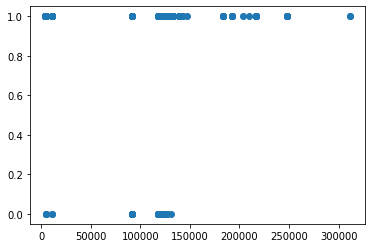

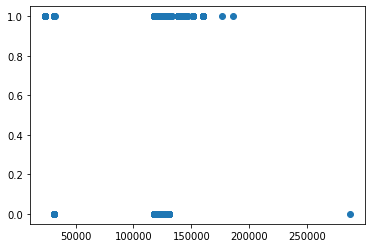

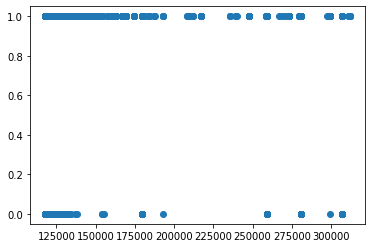

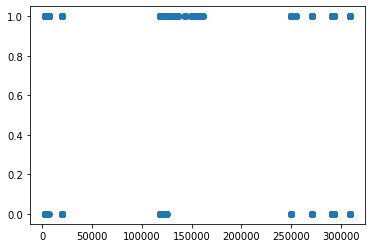

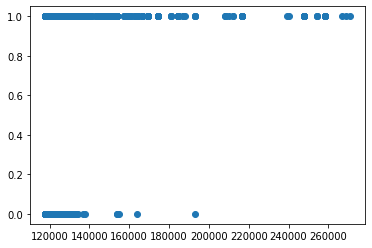

In [ ]:
x = train['ROLE_ROLLUP_1']
y = train['ACTION']
plt.scatter(x, y)
plt.show()

x = train['ROLE_ROLLUP_2']
y = train['ACTION']
plt.scatter(x, y)
plt.show()

x = train['ROLE_TITLE']
y = train['ACTION']
plt.scatter(x, y)
plt.show()

x = train['ROLE_FAMILY']
y = train['ACTION']
plt.scatter(x, y)
plt.show()

x = train['ROLE_CODE']
y = train['ACTION']
plt.scatter(x, y)
plt.show()

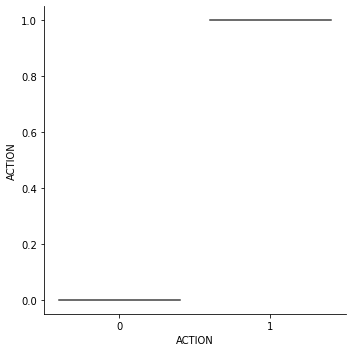

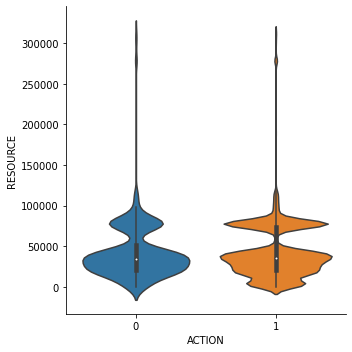

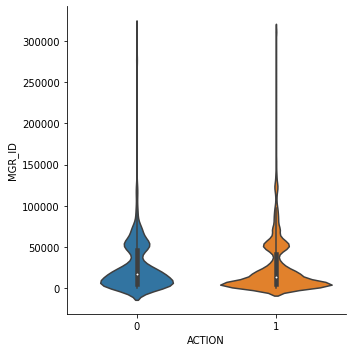

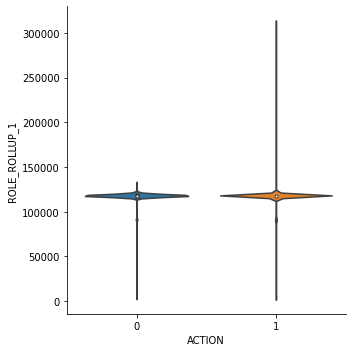

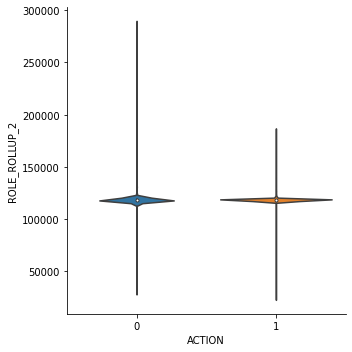

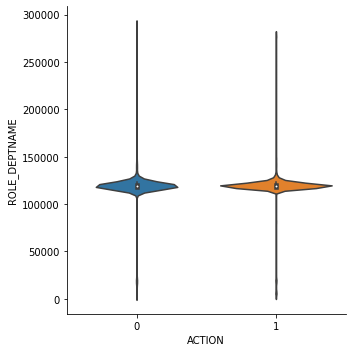

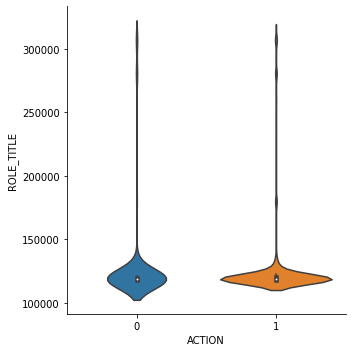

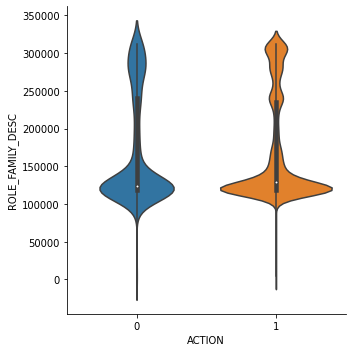

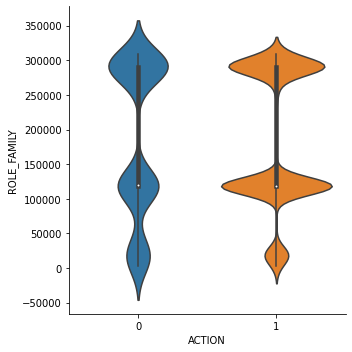

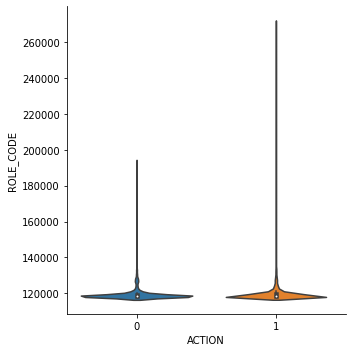

In [ ]:
for i in train.columns:
  sns.catplot(x='ACTION', y=i,kind = 'violin',data=train)

In [ ]:
action = train['ACTION']
train.drop(['ACTION'], axis = 1, inplace = True)

In [ ]:
X = train
Y = action

train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size=0.30, random_state=0)

In [ ]:
xgb_model = xgb.XGBClassifier()
optimization_dict = {'max_depth': [2,4,6],
                     'n_estimators': [50,100,200]}

model = GridSearchCV(xgb_model, optimization_dict, 
                     scoring='accuracy', verbose=1)

model.fit(train_x,train_y)
print(model.best_score_)
print(model.best_params_)

model = XGBClassifier(reg_lambda = 1.5)

model.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.9447205808310473
{'max_depth': 6, 'n_estimators': 200}


XGBClassifier(reg_lambda=1.5)

In [ ]:
y_pred = model.predict(val_x)
Y = np.array(val_y)

print("The accuray on validation dataset is:",accuracy_score(Y,y_pred)*100,"%")

The accuray on validation dataset is: 94.35459261519684 %


In [ ]:
id = test['id']
test.drop(['id'],axis = 1,inplace = True)
feature_columns = train.columns

In [ ]:
model_predictions = model.predict(test[feature_columns])
results = pd.DataFrame({'Id': id, 'Action': model_predictions})

results.head()

,Id,Action
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [ ]:
results.to_csv('/content/gdrive/MyDrive/1_subtask2method3/Solution.csv', index=False)